# Assignment 3

In the third assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email Gosia and Rein and don't forget to commit the most recent version of you assignment on Github so that we can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.

### Deadline: December 1, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

### notice
I worked together with Bas Straathof in my quest to correct solutions!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


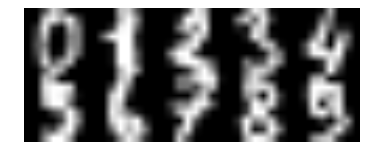

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

#Show both rows at the same time using nearest-neighbor interpolation (pixelated image)
#plt.imshow(np.vstack((firstrow,secondrow)),  interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster look like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [3]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c, target):
    for i in range(10):
        print "There are ", np.sum(best_c == i), " elements in cluster ", i
    
    for cluster in range(10):
        #Create two rows with numbers
        # test or normal x
        test_or_x = digits.images[target:]
        filtered = test_or_x[best_c == cluster,:,:]
        
        if filtered.shape[0] < 5:
            print "not enough items in cluster ", cluster
            continue

        rows = np.floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = np.hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        plt.gray()
        plt.axis('off')

        #Show both rows at the same time
        plt.imshow(np.vstack(image_rows))
        plt.show()

        print "The cluster shown above is: ", cluster

In [4]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = np.hstack(mu[:5,:,:])
    secondrow = np.hstack(mu[5:,:,:])

    plt.gray()
    plt.axis('off')

    #Show both rows at the same time
    plt.imshow(np.vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of k-means. Please follow Andrew Ng's description and the instructions that come with the functions closely. 

Think about the problem one step at a time. First focus on implementing the functions and only then start thinking about how they all come together. The skeleton code will guide you to make sure that it will come together. 

Grading:
- Working version of compute_centroid, update_centroid and cost_function (0.5 point each)
- A working triple loop that successfully learns and stores the best result (3 points)
- Correct use of both visualization functions on your best result and an explanation how you got to the best result and why it is necessary to have many initializations (1.5 points)

In [5]:
#First write a function that takes as input 1 image x and the cluster centroids mu. 
#It returns a number that is the closest centroid (index of the closest centroid)
def compute_centroid(x,mu):
    #mu will be of size 64 by k
    #x will be of size 64 (need to reshape to 64 by 1!)
    #You can subtract x from mu, and numpy will "broadcast" over the columns, result is 64 by k
    #Then you can take the norm over the columns (give option axis = 0)
    #return the index of the closest
    return argmin(np.linalg.norm((mu - np.reshape(x, (64,1))), axis=0))


In [6]:
# Second write a function that takes as input:
# a cluster number
# the cluster centroids
# all the datapoints assigned to that cluster
#It returns an updated mu matrix for that cluster number
def update_centroid(centroid, mu, X_c):
    #you have to average over the columns in X_c and change only 1 specific column in mu
    x = np.mean(X_c, axis = 1)
    mu[:,centroid] = x
    return mu
 

In [7]:
#Now write the cost function. This will be exactly the same as the compute_centroid
#However it will return the actual minimum and not the index of the centroid
def cost_function(x,mu):
    return min(np.linalg.norm((mu - np.reshape(x, (64,1))), axis=0))

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


There are  155  elements in cluster  0
There are  117  elements in cluster  1
There are  171  elements in cluster  2
There are  77  elements in cluster  3
There are  173  elements in cluster  4
There are  153  elements in cluster  5
There are  138  elements in cluster  6
There are  149  elements in cluster  7
There are  216  elements in cluster  8
There are  151  elements in cluster  9


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


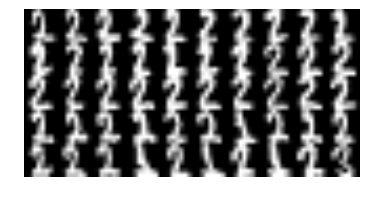

The cluster shown above is:  0


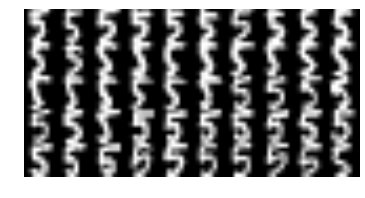

The cluster shown above is:  1


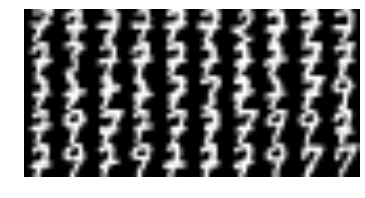

The cluster shown above is:  2


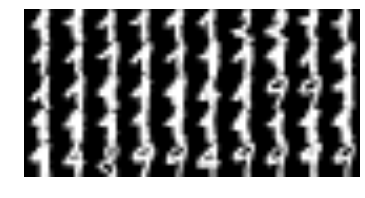

The cluster shown above is:  3


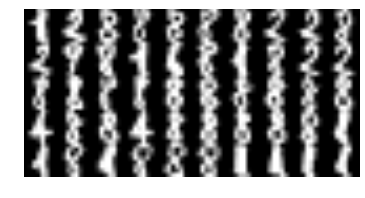

The cluster shown above is:  4


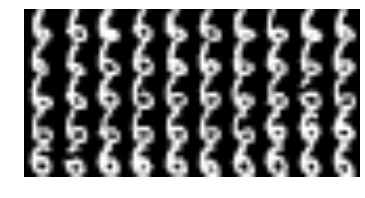

The cluster shown above is:  5


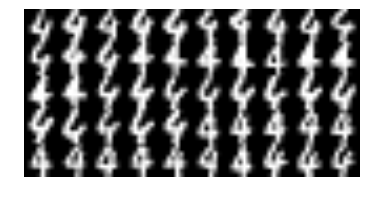

The cluster shown above is:  6


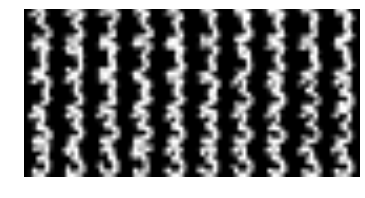

The cluster shown above is:  7


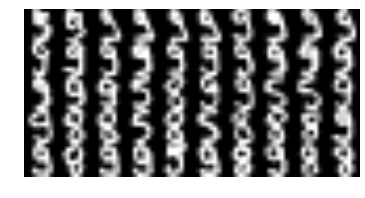

The cluster shown above is:  8


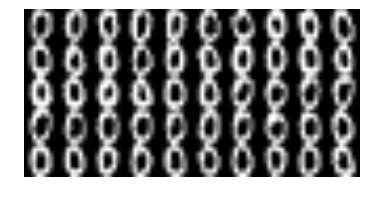

The cluster shown above is:  9
and for the test set: 

There are  22  elements in cluster  0
There are  29  elements in cluster  1
There are  37  elements in cluster  2
There are  11  elements in cluster  3
There are  54  elements in cluster  4
There are  29  elements in cluster  5
There are  32  elements in cluster  6
There are  24  elements in cluster  7
There are  32  elements in cluster  8
There are  27  elements in cluster  9


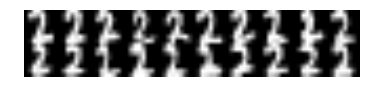

The cluster shown above is:  0


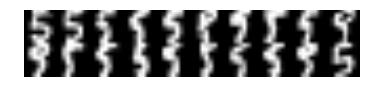

The cluster shown above is:  1


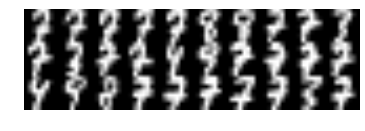

The cluster shown above is:  2


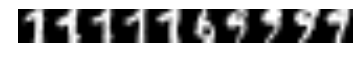

The cluster shown above is:  3


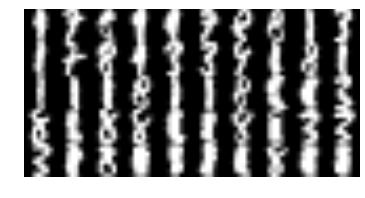

The cluster shown above is:  4


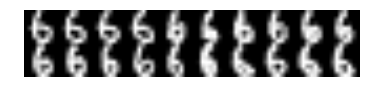

The cluster shown above is:  5


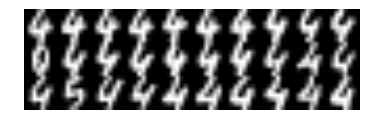

The cluster shown above is:  6


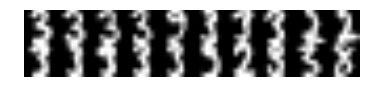

The cluster shown above is:  7


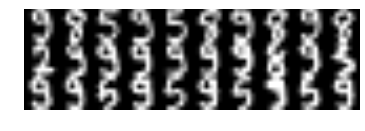

The cluster shown above is:  8


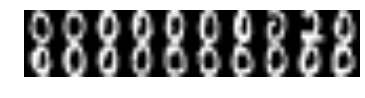

The cluster shown above is:  9


In [8]:
#The amount of iterations
initialisation_iterations = 100
iterations = 20

#define the amount of clusters k
k = 10

# our training set
'''
In this implementation of the k-means algorithm, 
we split the handwritten digits data in a 
training and a test set of 75% and 25% size respectively. 
'''
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))
    
# for comparison bonus
plt_min_cost = [] 
# initialization empty minimal values
min_cost = 0
min_mu = np.zeros((0, k, 64))
min_c = np.zeros((0, k, 1500))
# initialize mu's randomly 
# large number of iterations!
for h in range(initialisation_iterations):
    # mu is the centroid matrix, initialized by sampling from a uniform distribution (shape is 64 by k!)
    mu = np.random.uniform(0,16,(64,k))
        
    # c is the vector that assigns each digit to a centroid
    # initialized with integers between 0 and 10, the shape is 1500 by nothing
    c = np.random.randint(0,k,(1500))
    
    # some initialization variables
    current_cost = 0
    plt_cost = []
    # keep cost function variables
    J = []
    stop_condition = 0.001
    counter = 0
    # Perform k means algorithm
    while counter < iterations:
        # Update the centroid of all the clusters
        for i in range(k):
            # Create X_c matrix
            X_c = np.array([x[l] for l in np.where(c == i)])
            # minimizes J with respect to mu_1 .. mu_k
            mu = update_centroid(i, mu, X_c)  
        # Assign a new cluster to each datapoint
        for i in range(x.shape[0]): 
            # this minimizes the cost function holding mu fixed
            c[i] = compute_centroid(x[i], mu)
        
        # calculate current cost
        # decreases every iteration
        current_cost = sum([cost_function(x[i], mu) for i in range(x.shape[0])])/x.shape[0]
        
        # store for stop condition
        J.append(current_cost)
        plt_cost.append(current_cost)
        if counter > 1 and J[counter-1] - J[counter] < stop_condition:
            # print "reached kmeans stop condition after: " + str(counter) + " loops for init_iteration " + str(h)
            break
        
        # increment counter
        counter+=1
        
    # this is the cost after an iteration, which is minimum for that particular iteration
    # if we have found a global minimum cost -> change values
    if current_cost < min_cost or min_cost == 0:
        plt_min_cost = plt_cost # for plotting later on.
        min_cost = current_cost # set the best cost
        min_mu = mu # this is the best mu we got so far
        min_c = c # this is the best clustering we got so far

# plot our best attempts
# 0 to 1500
visualize(min_c, 0)
visualize_centroids(min_mu)

# let's try to do this on our test set as well
c_test = np.zeros(297)
mu = min_mu

# Assigning a new cluster to each image representation
for i in range(x_test.shape[0]):
    c_test[i] = compute_centroid(x_test[i], mu)

print "and for the test set: \n"
# c's go from 1500 to 1797, specify target
visualize(c_test, 1500)


## Bonus - EXPLANATION BELOW

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization

Max 0.5 points extra, your final amount of points cannot be more than 6.

Note: only attempt this if you're confident you got everything working.

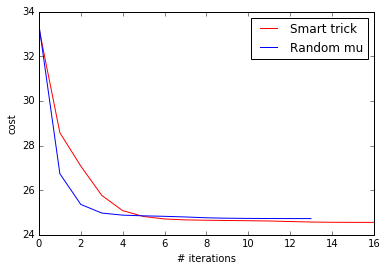

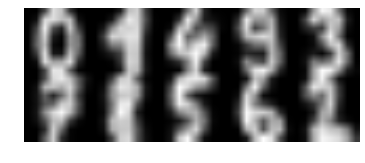

In [19]:
#You should initialize mu as:
mu = x[:10,:].T
# random clustering
c = np.random.randint(0,k,(1500))

# plotting
current_cost = []
# min_c = np.zeros((0, k, 1500))
j = 0
J_bonus = []
while j < iterations:
    for i in range(k):
        X_c = np.array([x[l] for l in np.where(c == i)])
        # minimizes J with respect to mu_1 .. mu_k
        mu = update_centroid(i, mu, X_c)  
    for i in range(x.shape[0]): 
        # this minimizes the cost function holding mu fixed
        c[i] = compute_centroid(x[i], mu)

    # calculate current cost
    current_cost.append(sum([cost_function(x[i], mu) for i in range(x.shape[0])])/x.shape[0])
    
    if j > 1 and current_cost[j-1] - current_cost[j] < stop_condition:
        break
    j+=1
    
# this plots the current cost for the smart trick
plt.plot(current_cost,  label='Smart trick mu', color='r')
# this was the best mu we got after initialization_iterations initializations of mu
# good that we also see the best mu to be flattened out: it 
# didn't need those maximum number of kmeans iterations to
# get it's optimal value
plt.plot(plt_min_cost,  label='Random mu')
plt.legend(['Smart trick', 'Random mu'])
plt.xlabel('# iterations')
plt.ylabel('cost')
plt.show()

# visualize centroids
visualize_centroids(mu)

## Explanation

After visualizing the centroids, we can clearly still identify the digits. This actually looks not that different from our best centroid visualization that we had when we used random mu initializations. However, the cost function plot shows that the ultimate cost of the best random mu configuration we had has lower cost than the "smart trick" we used. This means that this method might not be the most efficient. If we rerun the smart trick, the plot will change but most of the time the best random mu will have lower cost, and therefore better representations of the digits, than the smart trick. We also see that the random mu has initially the same cost as the smart trick mu: it might have been the very same configuration for all we know (not really because the means do shift differently otherwise the two lines would have been exactly the same). Of course, the smart trick does save us an immense amount of computation time and only has a small difference in efficiency and accuracy as the results we got after 100 iterations.